### Grubb's Test

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import t
from scipy.stats import probplot

In [2]:
data = [199.31, 199.53, 200.19, 200.82, 201.92, 201.95, 202.18, 245.57]
data = np.array(data)

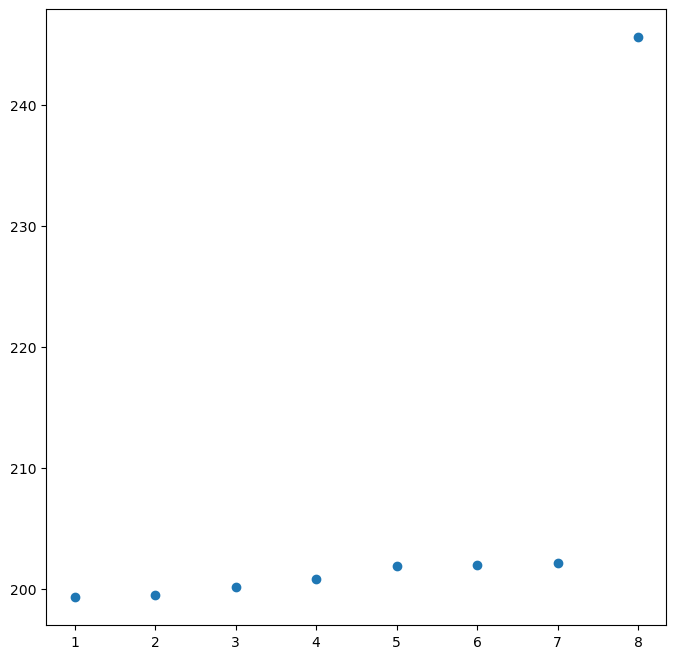

In [3]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(data)),data)
plt.xticks(range(len(data)),range(1,len(data)+1))
plt.show()

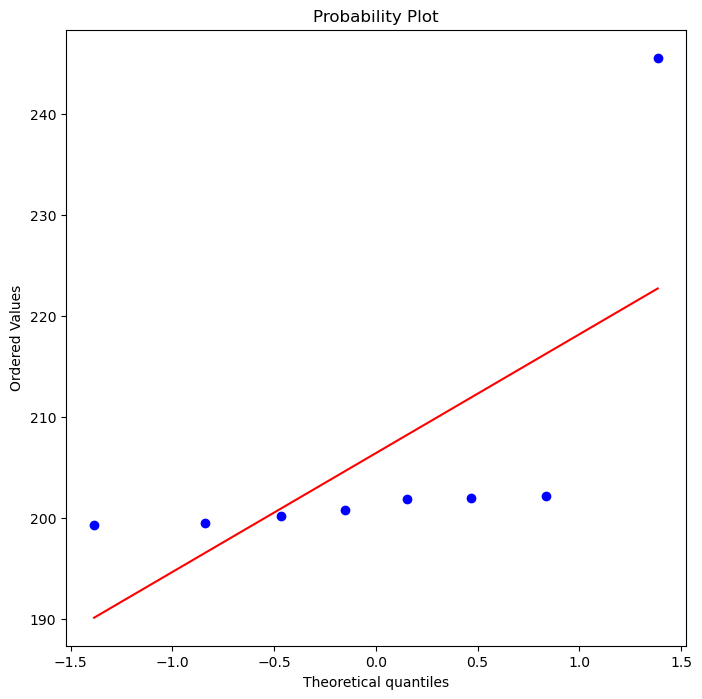

In [4]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(data,plot=ax)
plt.show()

In [5]:
def grubbs_test(data, two_sided=True, alpha=0.05):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    constant = (len(data)-1)/np.sqrt(len(data))
    
    if two_sided:
        diff = np.abs(data-mean)
        max_diff = np.max(diff)
        
        G = max_diff/std
        sig_alpha = alpha/(2*len(data))
        t_critical = t.ppf(1-sig_alpha, len(data)-2)
        critical_val = constant*np.sqrt(np.square(t_critical)/(len(data) - 2 + np.square(t_critical)))
        
        if G > critical_val:
            idx = np.where(diff == max_diff)[0][0]
            suspected_outlier = data[idx]
            outlier_idx = idx
            return (outlier_idx, suspected_outlier, G, critical_val)
        else:
            return (G, critical_val)
        
    else:
        result = []
        G = (np.max(data)-mean)/std
        sig_alpha = alpha/(len(data))
        t_critical = t.ppf(1-sig_alpha, len(data)-2)
        critical_val = constant*np.sqrt(np.square(t_critical)/(len(data) - 2 + np.square(t_critical)))
        
        if G > critical_val:
            idx = np.where(x==np.max(data))[0][0]
            suspected_outlier = data[idx]
            outlier_idx = idx
            result.append((outlier_idx, suspected_outlier, G, critical_val))
            
        G = (mean - np.min(data))/std
        
        if G > critical_val:
            idx = np.where(x==np.min(data))[0][0]
            suspected_outlier = data[idx]
            outlier_idx = idx
            result.append((outlier_idx, suspected_outlier, G))
        return result
        

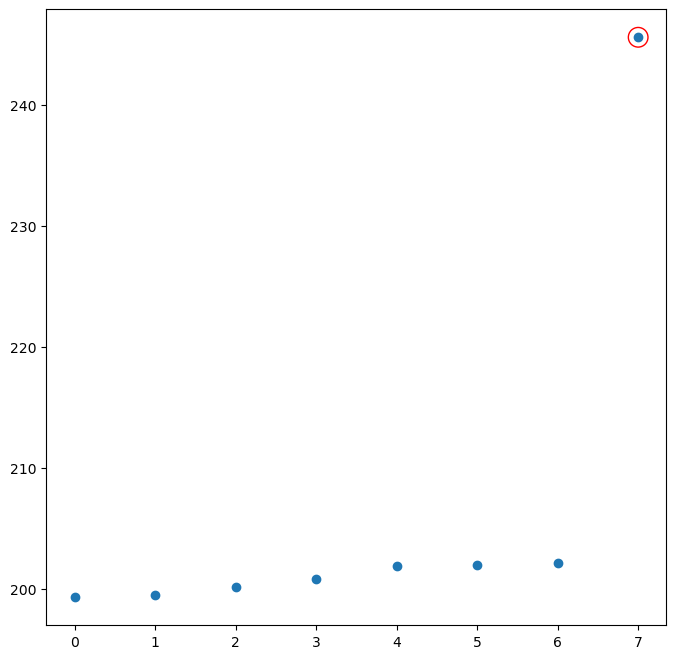

In [6]:
res = grubbs_test(data, two_sided=True, alpha=0.05)

if len(res) == 4:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)),data)
    plt.scatter(res[0], res[1], s=200, facecolor='none', edgecolors='r')
    plt.show()
    
else:
    print(res)
    print('There is no outlier')

In [7]:
data = [9.1, 79.5, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6, 18.6, 17.3, 25.8, 78, 23.1, 11.9, 20.1, 20.3, 14.1, 26.5]
data = np.array(data)

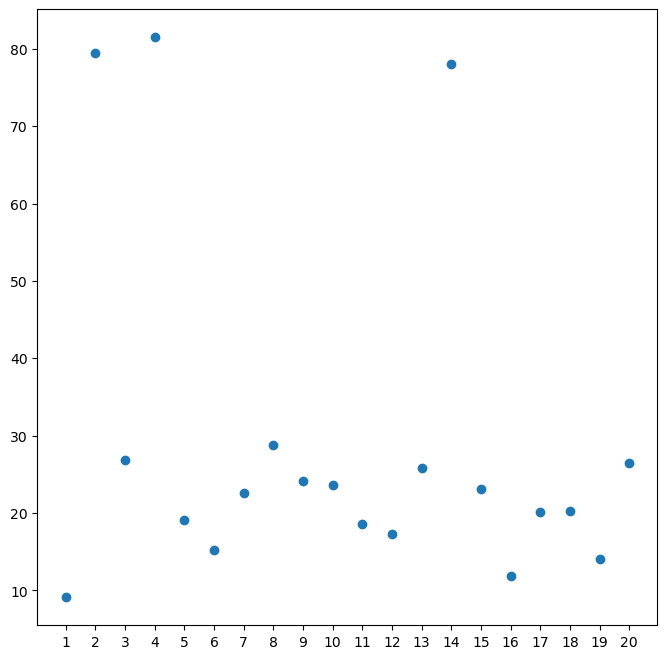

In [8]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(data)),data)
plt.xticks(range(len(data)),range(1,len(data)+1))
plt.show()

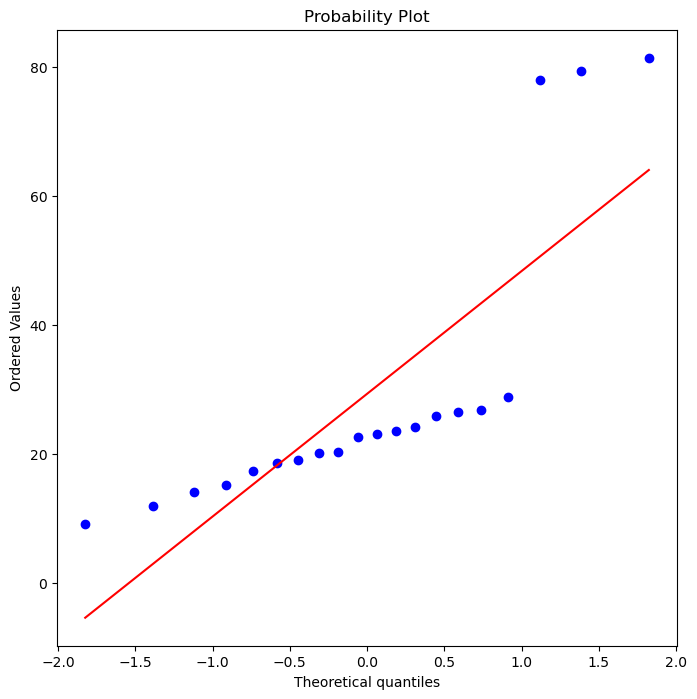

In [9]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(data,plot=ax)
plt.show()

In [10]:
res = grubbs_test(data, two_sided=True, alpha=0.05)

if len(res) == 4:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)),data)
    plt.scatter(res[0], res[1], s=200, facecolor='none', edgecolors='r')
    plt.show()
    
else:
    print(res)
    print('There is no outlier')

(2.340023460394114, 2.708245645436111)
There is no outlier


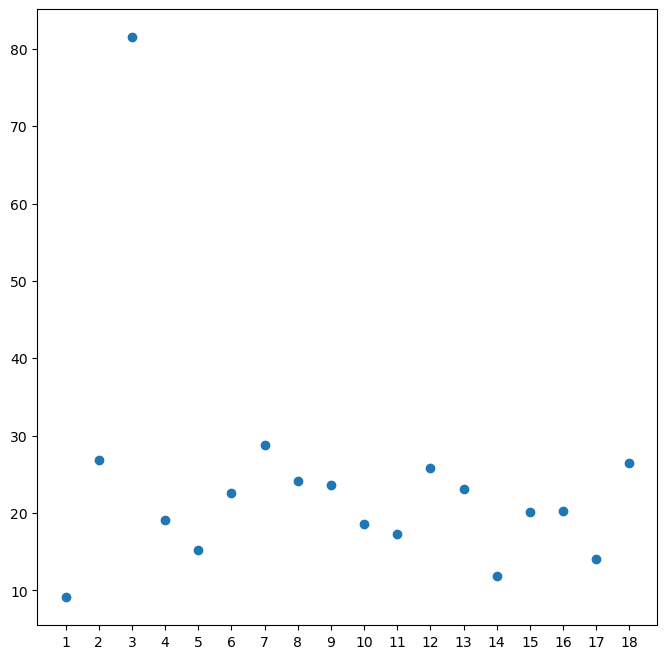

In [11]:
temp_data = [9.1, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6, 18.6, 17.3, 25.8, 23.1, 11.9, 20.1, 20.3, 14.1, 26.5]
temp_data = np.array(temp_data)

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(temp_data)),temp_data)
plt.xticks(range(len(temp_data)),range(1,len(temp_data)+1))
plt.show()

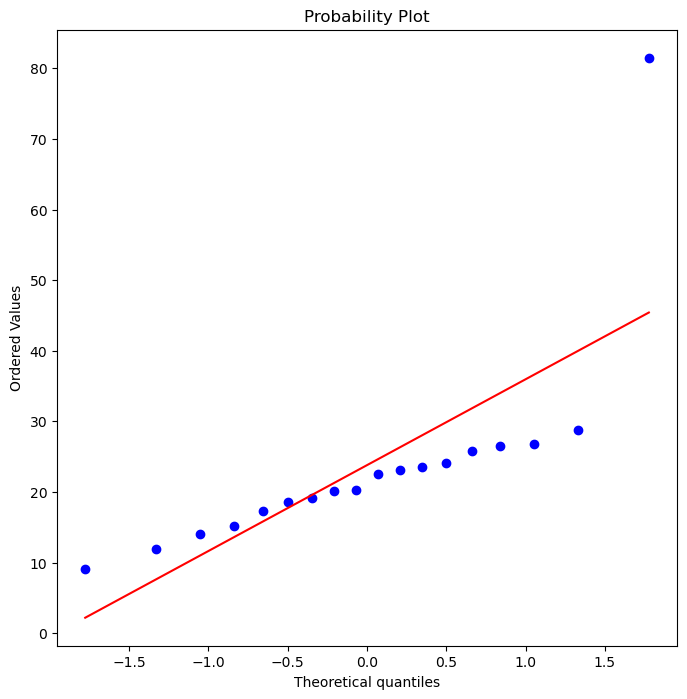

In [12]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
probplot(temp_data,plot=ax)
plt.show()

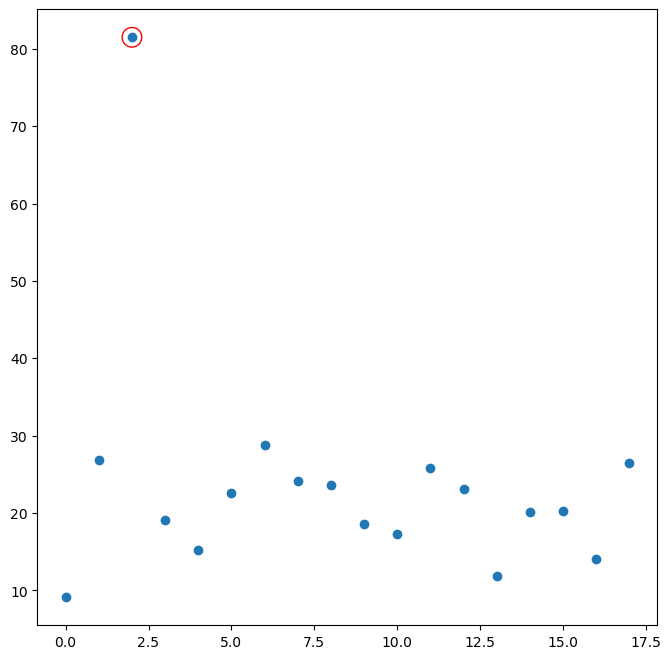

In [13]:
res = grubbs_test(temp_data, two_sided=True, alpha=0.05)

if len(res) == 4:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(temp_data)),temp_data)
    plt.scatter(res[0], res[1], s=200, facecolor='none', edgecolors='r')
    plt.show()
    
else:
    print(res)
    print('There is no outlier')

In [14]:
print(res[2])

3.7519852755088587


### Chauvenet's Criterion

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

In [16]:
data = [9.1, 79.5, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6, 18.6, 17.3, 25.8, 78, 23.1, 11.9, 20.1, 20.3, 14.1, 26.5]
data = np.array(data)

In [17]:
def chauvenet_criterion(data):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    
    standardized_data = np.abs((data-mean)/std)
    p_val = (1- norm.cdf(standardized_data)) < 1/(2*len(data))
    
    if len(np.where(p_val==True)[0]) > 0:
        idx = np.where(p_val==True)[0]
        value = data[idx]
        return (idx, value)
    else:
        return False

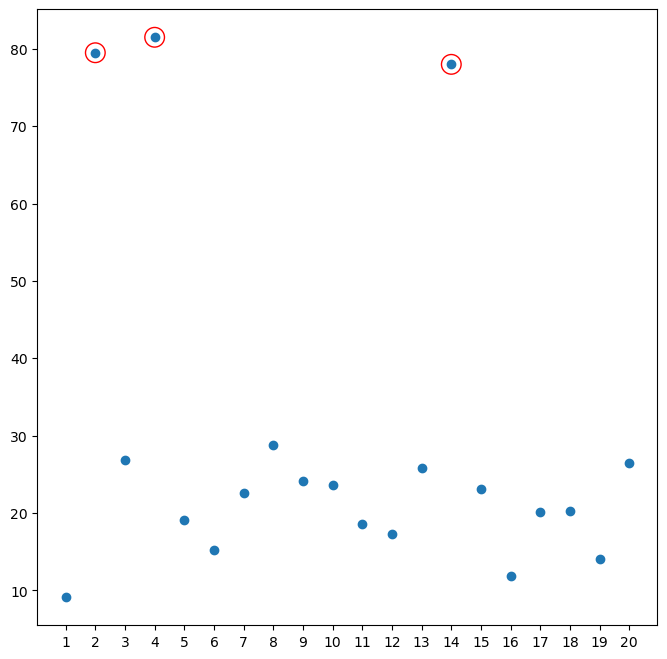

In [18]:
res = chauvenet_criterion(data)

if res:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0], res[1], s=200, facecolor='none', edgecolors='r')
    plt.xticks(range(len(data)), range(1, len(data)+1))
    plt.show()
else:
    print('There is no outlier')

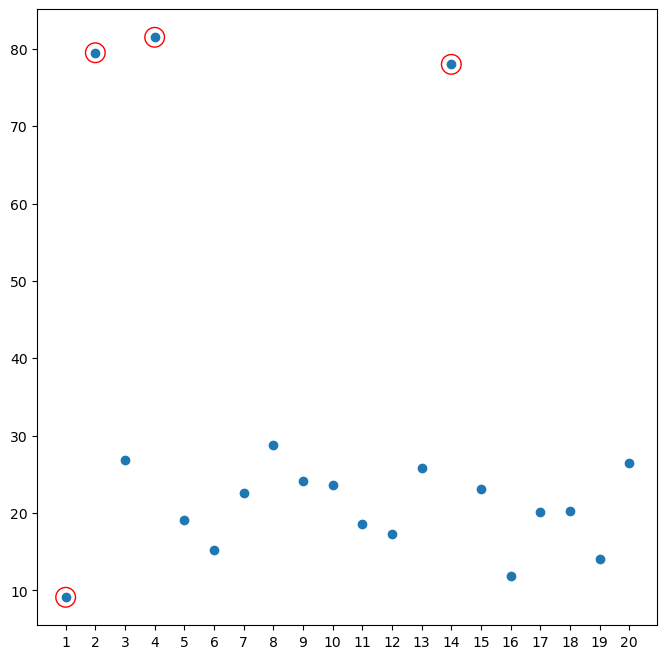

In [19]:
temp_data = data.copy()
outlier_idx = []
max_iter = 4
iter_num = 1

while iter_num <= max_iter :
    res = chauvenet_criterion(temp_data)
    
    if res:
        so = res[1][0]
        idx = np.where(data==so)[0][0]
        outlier_idx.append(idx)
        temp_data = np.delete(temp_data, res[0][0])
    else:
        break
        
    iter_num += 1
    
outlier_idx = np.array(outlier_idx)

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(data)),data)
plt.scatter(outlier_idx, data[outlier_idx], s=200, facecolor='none', edgecolors='r')
plt.xticks(range(len(data)), range(1, len(data)+1))
plt.show()

### Peirce's Criterion

In [20]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import erfc

In [21]:
data = [9.1, 79.5, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6, 18.6, 17.3, 25.8, 78, 23.1, 11.9, 20.1, 20.3, 14.1, 26.5]
data = np.array(data)

In [22]:
def peirce_dev(N: int, n:int, m: int) -> float:
    N = float(N)
    n = float(n)
    m = float(m)
    
    if N > 1:
        Q = (n**(n/N)*(N-n)**((N-n)/N))/ N
        r_new = 1.0
        r_old = 0.0
        
        while abs(r_new - r_old) > (N*2.0e-16) :
            ldiv = r_new ** n
            
            if ldiv == 0:
                ldiv = 1.0e-6
            Lambda = ((Q**N) / (ldiv)) ** (1.0 / (N-n))
            x2 = 1.0 + (N- m - n)/n * (1.0 - Lambda**2.0)
            
            if x2 < 0:
                x2 = 0.0
                r_old = r_new
            else:
                r_old = r_new
                r_new = np.exp((x2-1) / 2.0) * erfc(np.sqrt(x2)/np.sqrt(2.0))
    else:
        x2 = 0.0
    return x2

In [23]:
def peirce_criterion(data):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    
    N = len(data)
    
    temp_data = data.copy()
    outlier_idx = []
    n = 1 #탐지할 이상치 개수 
    
    while n <= N-1:
        dev = np.abs((temp_data - mean)/std)
        R = np.sqrt(peirce_dev(N,n,1))
        idx = np.where(dev > R)[0]
        
        if len(idx) > 0:
            temp_data_points = temp_data[idx]
            temp_idx = []
            
            for x in temp_data_points:
                temp_idx += list(np.where(data == x)[0])
                
            outlier_idx += temp_idx
            temp_data = np.delete(temp_data, idx)
            n += len(idx)
        else:
            break
            
    outlier_idx = np.array(outlier_idx)
    value = data[outlier_idx]
    
    if len(outlier_idx) > 0:
        return (outlier_idx, value)
    else:
        return False

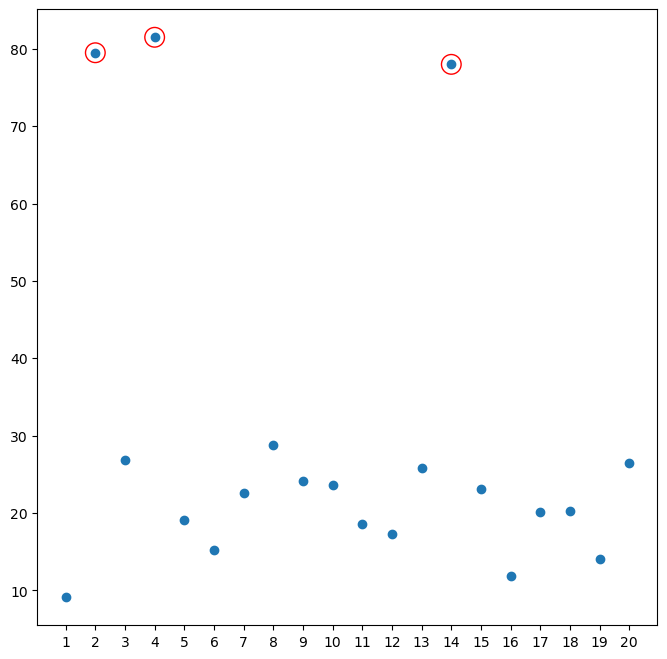

In [24]:
res = peirce_criterion(data)

if res:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0], res[1], s=200, facecolor='none', edgecolors='r')
    plt.xticks(range(len(data)), range(1, len(data)+1))
    plt.show()
else:
    print('There is no outlier')

### Dixon's Q-Test

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from math import fabs
from collections import deque
from scipy.stats import norm
from scipy.special import erf
from scipy.optimize import root

In [26]:
data = [9.1, 79.5, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6, 18.6, 17.3, 25.8, 78, 23.1, 11.9, 20.1, 20.3, 14.1, 26.5]
data = np.array(data)

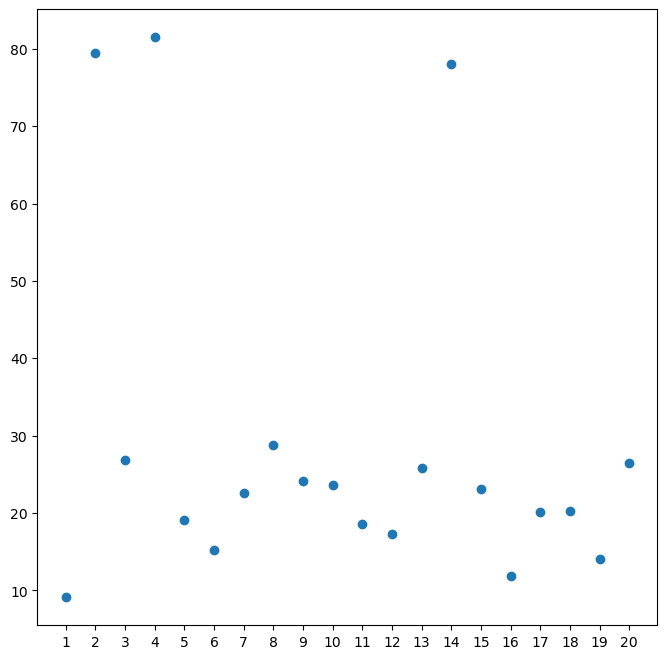

In [27]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
plt.scatter(range(len(data)),data)
plt.xticks(range(len(data)),range(1,len(data)+1))
plt.show()

In [28]:
def prod(seq):
    s = deque()
    
    for x in seq:
        s.appendleft(x) if fabs(x) < 1.0  else s.append(x)
    
    while len(s) > 1:
        x = s.popleft() * s.pop()
        s.appendleft(x) if fabs(x) < 1.0 else s.append(x)
    return s[0] if s else 1.0

In [29]:
def get_exp_xpower_int(k, b=None):
    if b:
        if k==0:
            return (np.sqrt(np.pi)/2)*erf(b)
        elif k ==1:
            return 0.5*(1 - np.exp(-np.square(b)))
        else:
            return ((k-1)*0.5)*get_exp_xpower_int(k-2,b) - 0.5*np.exp(-np.square(b) + (k-1)*np.log(b))
    
    else:
        if k==0:
            return np.sqrt(np.pi)/2
        elif k==1:
            return 1/2
        else:
            return ((k-1)*0.5)*get_exp_xpower_int(k-2)
        
def get_exp_poly_int(coef, b=None):
    res = 0
    
    for i in range(len(coef)):
        res += prod([coef[i], get_exp_xpower_int(i,b)])
    return res
    
def get_polynomial(n, b=None):
    if n == 0:
        return np.array([1])
    elif n==1:
        if b:
            return np.array([1, -(1 - np.exp(-np.square(b)))/(np.sqrt(np.pi)*erf(b))])
        else:
            return np.array([1, -(1/np.sqrt(np.pi))])
    else:
        first = get_polynomial(n-1, b)
        
        p = np.poly1d(first)
        p2 = p*p
        p2_coef = np.flip(p2.coef)
        gamma_first = get_exp_poly_int(p2_coef,b)
        p2_coef_shifted = np.insert(p2_coef,0,0)
        integral_component = get_exp_poly_int(p2_coef_shifted, b)
        alpha = -prod([1/gamma_first,integral_component])
        
        first_plus_order = np.insert(first, len(first), 0)
        first_plus_order = np.poly1d(first_plus_order)
        
        first_multiplied_const = alpha*first
        first_multiplied_const = np.poly1d(first_multiplied_const)
        
        second = get_polynomial(n-2,b)
        ps = np.poly1d(second)
        ps2 = ps*ps
        ps2_coef = np.flip(ps2.coef)
        gamma_second = get_exp_poly_int(ps2_coef, b)
        
        beta = -prod([gamma_first, 1/gamma_second])
        second_multiplied_const = beta*second
        second_multiplied_const = np.poly1d(second_multiplied_const)
        
        return (first_plus_order + first_multiplied_const + second_multiplied_const).coef
    
def get_weight_and_points(n, b=None):
    assert n>0 and isinstance(n,int), 'n must be integer greater than 0'
    
    coef = get_polynomial(n,b)
    coef_prev = get_polynomial(n-1, b)
    points = np.roots(coef)
    
    p = np.poly1d(coef)
    
    p_prev = np.poly1d(coef_prev)
    p2_prev = p_prev*p_prev
    p2_prev_coef = np.flip(p2_prev.coef)
    gamma = get_exp_poly_int(p2_prev_coef, b)
    first = p.deriv()(points)
    second = p_prev(points)
    denominator = first * second
    weights = gamma/denominator
    
    return (weights, points)

In [30]:
def get_cv_Dixon_test(n, i=1, j=1, alpha = 0.05):
    
    fac = np.math.factorial
    cdf = norm.cdf
    
    N = ((2**np.pi)**(-1.5))*(fac(n)/(fac(i-1)*fac(n-j-i-1)*fac(j-1)))
    
    fh_res = np.polynomial.hermite.hermgauss(30)
    fh_weights = fh_res[1]
    fh_points = fh_res[0]
    hh_res = get_weight_and_points(15)
    hh_weights = hh_res[0]
    hh_points = hh_res[1]
    
    gl_res = np.polynomial.legendre.leggauss(12)
    gl_weights = gl_res[1]
    gl_points = gl_res[0]
    
    def J(x,v,r):
        first_elem = np.power(cdf(x-v), i-1)
        second_elem = np.power((cdf(x - r*v) - cdf(x-v)), n-j-i-1)
        third_elem = np.power((cdf(x) - cdf(x - r*v)), j-1)
        return prod([first_elem, second_elem, third_elem])
    
    def second_func(t, u, r):
        x = u * np.sqrt(2/3)
        v = t * np.sqrt(2/(1 + r**2))
        last_term = np.exp(2*u*t*(1+r)/np.sqrt(3*(1 + r**2)))
        return prod([J(x,v,r), last_term, t])
    
    def p(r):
        const = N*np.sqrt(2/3)*(2/(1 + r**2))
        summand = 0
        
        for k,u in enumerate(fh_points):
            for l,t in enumerate(hh_points):
                summand += prod([fh_weights[k], hh_weights[l], second_func(t,u,r)])
        return const*summand
    
    def g(R):
        summand = 0
        
        for w,y in  zip(gl_weights, gl_points):
            summand += prod([2,p(prod([0.5, R, y+1]))])
        return prod([0.5, R, summand])
            
    
    def objective(R, alpha):
        return 1 - alpha - g(R)
    
    cv = root(objective, 0.5, args=(alpha))
    return cv.x[0]

In [31]:
def dixon_q_test(data, alpha=0.05, i=1, j=1, two_sided=True, lowest=True):
    temp_data = data.copy()
    temp_data = np.sort(temp_data)
    test_statistics1 = (temp_data[j] - temp_data[0])/ (temp_data[-i] - temp_data[0])
    test_statistics2 = (temp_data[-1] - temp_data[-1-j]) / (temp_data[-1] - temp_data[i-1])
    
    n = len(data)
    
    if two_sided:
        cv = get_cv_Dixon_test(n, i=i, j=j, alpha = alpha*0.5)
        outlier_idx = []
        
        if test_statistics1 > cv:
            idx = np.where(data == temp_data[0])[0][0]
            outlier_idx.append(idx)
        if test_statistics2 > cv:
            idx = np.where(data == temp_data[-1])[0][0]
            outlier_idx.append(idx)
            
        if outlier_idx:
            outlier_idx = np.array(outlier_idx)
            values = data[outlier_idx]
            return (outlier_idx, values, test_statistics1, test_statistics2, cv)
        else:
            return (test_statistics1, test_statistics2, cv)
    else:
        cv = get_cv_Dixon_test(n, i=i, j=j, alpha = alpha)
        
        if lowest:
            if test_statistics1 > cv:
                idx = np.where(data == temp_data[0])[0][0]
                return (idx, data[idx], test_statistics1, cv)
            else:
                return (test_statistics1, cv)
        else:
            if test_statistics2 > cv:
                idx = np.where(data == temp_data[-1])[0][0]
                return (idx, data[idx], test_statistics2, cv)
            else:
                return(test_statistics2, cv)

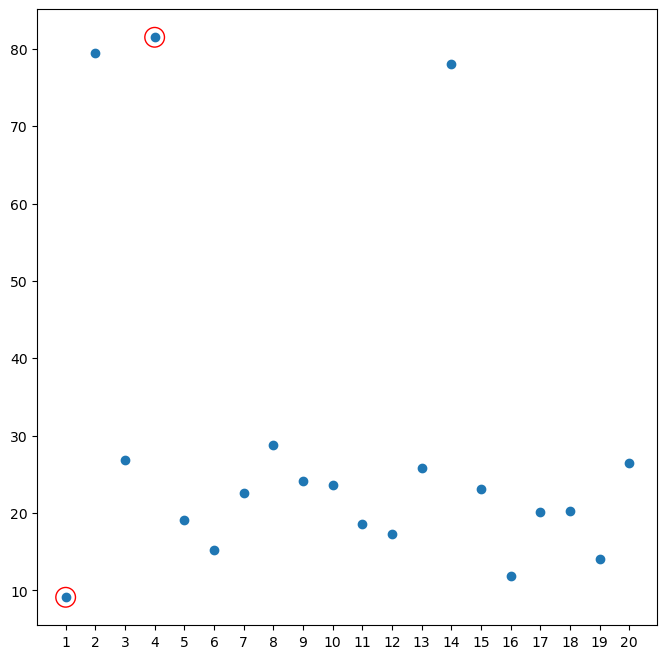

In [32]:
res = dixon_q_test(data, alpha=0.05, i=1, j=1, two_sided=True, lowest=True)

if len(res) == 5:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0], res[1], s=200, facecolor='none', edgecolors='r')
    plt.xticks(range(len(data)), range(1,len(data)+1))
    plt.show()
else:
    print('There is no outlier')

In [33]:
data = [199.31, 199.53, 200.19, 200.82, 201.92, 201.95, 202.18, 245.57]
data = np.array(data)

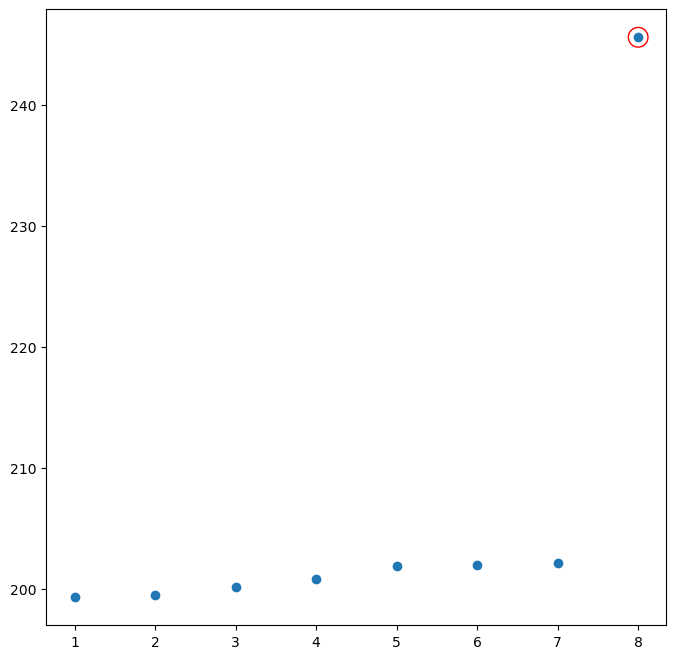

In [34]:
res = dixon_q_test(data, alpha=0.05, i=1, j=1, two_sided=True, lowest=True)

if len(res) == 5:
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0], res[1], s=200, facecolor='none', edgecolors='r')
    plt.xticks(range(len(data)), range(1,len(data)+1))
    plt.show()
else:
    print('There is no outlier')

### Generalized Extreme Stundetized Deviation Test

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import t

In [36]:
data = [9.1, 79.5, 26.8, 81.5, 19.1, 15.2, 22.6, 28.8, 24.1, 23.6, 18.6, 17.3, 25.8, 78, 23.1, 11.9, 20.1, 20.3, 14.1, 26.5]
data = np.array(data)

In [37]:
def generalized_esd(data, num_outliers, alpha=0.05):
    assert len(data) - num_outliers > 0, 'invalid num_outliers'
    
    n = len(data)
    temp_data = data.copy()
    res = []
    
    for i in range(num_outliers):
        mean = np.mean(temp_data)
        std = np.std(temp_data, ddof=1)
        diff = np.abs(temp_data - mean)
        R = np.max(diff)/std
        
        t_val = t.ppf(1 - alpha/(2*(n-i)), n-i-2)
        lambda_val = (n-i-1)*t_val / np.sqrt((n-i-2+t_val**2)*(n-i))
        
        temp_idx = np.where(diff == np.max(diff))[0][0]
        temp_data_point = temp_data[temp_idx]
        idx = np.where(data == temp_data_point)[0][0]
        value = data[idx]
        flag = R > lambda_val
        res.append((idx, value, flag, R, lambda_val))
        temp_data = np.delete(temp_data, temp_idx)
        
    if res:
        idx_suspected_outlier = []
        for i, r in enumerate(res):
            if r[2] == True:
                idx_suspected_outlier.append(i)
                
        num_suspected_outlier = max(idx_suspected_outlier) + 1
        outlier_idx = [res[i][0] for i in range(num_suspected_outlier)]
        outlier_idx = np.array(outlier_idx)
        values = data[outlier_idx]
        Rs = [res[i][3] for i in range(num_suspected_outlier)]
        lambdas = [res[i][4] for i in range(num_suspected_outlier)]
        return (outlier_idx, values, Rs, lambdas)

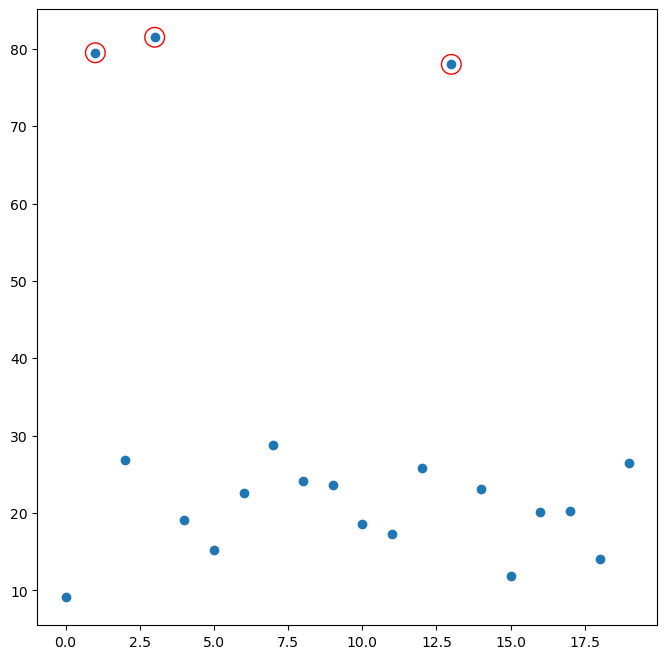

In [38]:
res = generalized_esd(data, num_outliers=3, alpha=0.05)

if len(res) == 4 :
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0], res[1], s=200, facecolor='none', edgecolors='r')
    plt.show()
else:
    print(res)
    print('There is no outlier')

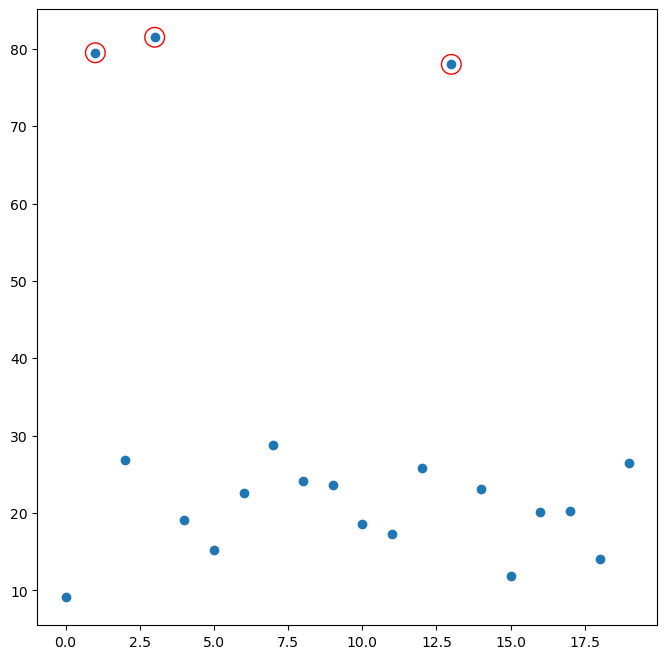

In [39]:
res = generalized_esd(data, num_outliers=10, alpha=0.05)

if len(res) == 4 :
    fig = plt.figure(figsize=(8,8))
    fig.set_facecolor('white')
    plt.scatter(range(len(data)), data)
    plt.scatter(res[0], res[1], s=200, facecolor='none', edgecolors='r')
    plt.show()
else:
    print(res)
    print('There is no outlier')